In [1]:
# importing dependencies
import pandas as pd 
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
# importing data
df=pd.read_csv('Gemini_BTCUSD_d.csv')

In [3]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1.680000e+12,13-05-2023,BTC,26812.00,27043.23,26704.39,26782.72,219.465684,5.877888e+06
1,1.680000e+12,12-05-2023,BTC,26995.01,27084.10,25818.00,26812.00,794.795070,2.131005e+07
2,1.680000e+12,11-05-2023,BTC,27617.75,27711.50,26723.39,26995.01,426.913146,1.152452e+07
3,1.680000e+12,10-05-2023,BTC,27648.34,28332.03,26817.83,27617.75,567.997875,1.568682e+07
4,1.680000e+12,09-05-2023,BTC,27692.90,27828.77,27376.52,27648.34,401.346534,1.109657e+07


In [4]:
df.dtypes

unix          float64
date           object
symbol         object
open          float64
high          float64
low           float64
close         float64
Volume BTC    float64
Volume USD    float64
dtype: object

In [5]:
df.columns

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')

In [6]:
df=df[['open', 'high', 'low', 'close']]

In [7]:
df.head()

,open,high,low,close
0,26812.00,27043.23,26704.39,26782.72
1,26995.01,27084.10,25818.00,26812.00
2,27617.75,27711.50,26723.39,26995.01
3,27648.34,28332.03,26817.83,27617.75
4,27692.90,27828.77,27376.52,27648.34


In [8]:
df.corr()

,open,high,low,close
open,1.000000,0.999341,0.998811,0.998541
high,0.999341,1.000000,0.998659,0.999330
low,0.998811,0.998659,1.000000,0.999208
close,0.998541,0.999330,0.999208,1.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


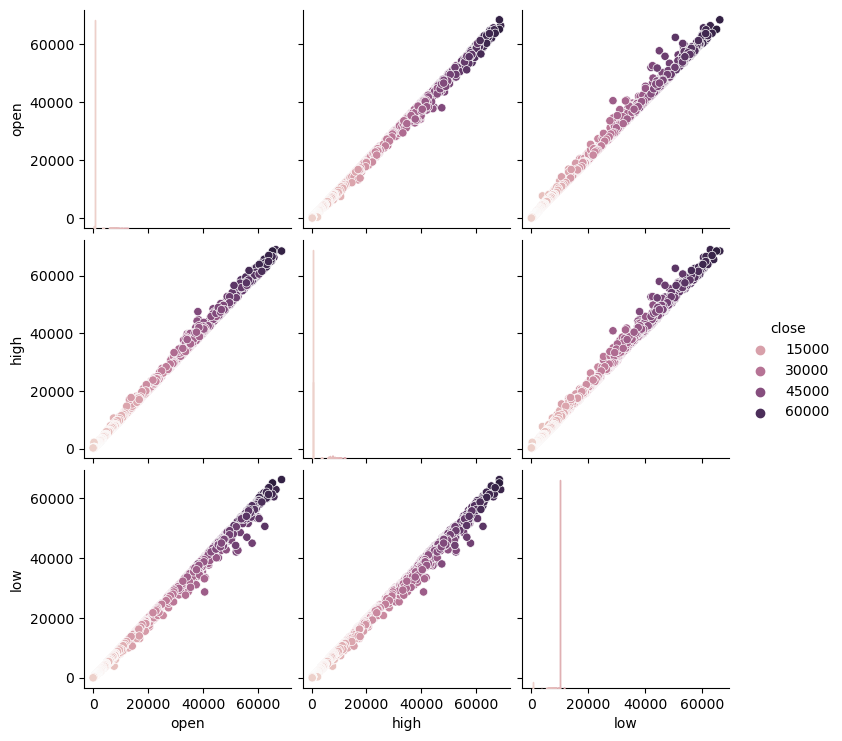

In [9]:
sb.pairplot(df,hue='close')

In [10]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
# Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)

In [12]:
X_train.head()

,open,high,low
3053,436.00,449.99,435.54
2844,666.54,687.56,665.15
1211,31203.46,34536.29,29914.50
2090,6467.92,6467.92,6467.92
1694,10311.07,10330.48,9925.00


In [14]:
# classsifier applying


classifier=LogisticRegression()

In [15]:
#hyperparameter tuning

parameters={
    'penalty':['l1', 'l2', 'elasticnet'],
    'C':[1,2,3,4,5,6,7,8,9,10,15,16,20,25,30,35,40,45,50],
    'max_iter':[100,200,300,400]
    
}

In [16]:
# applying GridSearchCV 
classifier_regressor=GridSearchCV(classifier,param_grid=parameters,scoring='accuracy',cv=10)

In [17]:
classifier_regressor.fit(X_train,y_train)

ValueError: 
All the 2280 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
760 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 56, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

--------------------------------------------------------------------------------
760 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1215, in fit
    check_classification_targets(y)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\multiclass.py", line 215, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

--------------------------------------------------------------------------------
760 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 56, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.


In [42]:
##linear Regression
# forming regressor
from sklearn.linear_model import LinearRegression

regressor1= LinearRegression() 
regressor2= LinearRegression(fit_intercept=True) 
regressor3= LinearRegression(copy_X=True) 
regressor4= LinearRegression( n_jobs=10)
regressor5= LinearRegression(positive=True)

In [43]:
regressor1.fit(X_train,y_train)
regressor2.fit(X_train,y_train)
regressor3.fit(X_train,y_train)
regressor4.fit(X_train,y_train)
regressor5.fit(X_train,y_train)

LinearRegression(positive=True)

In [44]:
y_pred1=regressor1.predict(X_test)
y_pred2=regressor2.predict(X_test)
y_pred3=regressor3.predict(X_test)
y_pred4=regressor4.predict(X_test)
y_pred5=regressor5.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score


In [46]:
data=pd.DataFrame(y_test)
data1=pd.DataFrame(y_pred1)
data2=pd.DataFrame(y_pred2)
data3=pd.DataFrame(y_pred3)
data4=pd.DataFrame(y_pred4)
data5=pd.DataFrame(y_pred5)

In [48]:
# data.to_excel('./data.xlsx')
data1.to_excel('./data1.xlsx')
data2.to_excel('./data2.xlsx')
data3.to_excel('./data3.xlsx')
data4.to_excel('./data4.xlsx')
data5.to_excel('./data5.xlsx')